In [61]:
import zipfile
import os
import pandas as pd
import pickle
import cv2
import numpy as np
import pprint
import matplotlib.pyplot as plt

%matplotlib inline

# Outline
* [Download Data](#Download-Data)
* [Data Exploration](#Data-Exploration)
* [Data Preprocessing](#Data-Preprocessing)

## Download Data
- Download data ffrom the repo
- Unzip the data from dataroot folder (with dataroot as the folder default)
- read in sign names from csv file

In [ ]:
def unzip_traffic_signs(directory='dataroot/'):
    """
    Unzips traffic sign files from a specified directory.

    Args:
        directory (str): The directory path where the traffic sign files are located. 
                         Defaults to 'dataroot/'.

    Raises:
        Exception: If an error occurs during the unzipping process, the exception is printed.

    Returns:
        None: The function does not return any value.
    """
    try:
        for file in os.listdir(directory):
            print(file)
            if file.endswith('.zip'):
                print('Unzipping ' + file)
                with zipfile.ZipFile(directory + file, 'r') as zip_ref:
                    print('Extracting ' + file)
                    zip_ref.extractall(directory)
    except Exception as e:
        print(e)

In [ ]:
def download_traffic_signs(directory='dataroot/', unzip_data=False, data_zip_link=[
    'https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip',
    'https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip',
    'https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip'
]):
    """
    Downloads traffic sign data from specified links and optionally unzips the data files.

    Args:
        directory (str): The directory path where the data files will be downloaded. 
                        Defaults to 'dataroot/'.
        unzip_data (bool): Whether to unzip the downloaded data files or not. 
                        Defaults to False.
        data_zip_link (list): A list of URLs pointing to the data zip files. 
                            Defaults to a list of three URLs.

    Raises:
        Exception: If an error occurs during the downloading or unzipping process, the exception is printed.

    Returns:
        None: The function does not return any value.
    """
    try:
        !mkdir $directory
        try:
            for link in data_zip_link:
                !wget -P $directory $link
                print(f"Data file {link} downloaded")
            if unzip_data:
                unzip_traffic_signs(directory)
        except Exception as e:
            print('Error downloading data')
            print(e)
    except Exception as e:
        print('Error making directory')
        print(e)    

In [53]:
def download_traffic_names(sign_name_url ="https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv"):
    """
    Downloads traffic sign names from a specified URL.

    Args:
        sign_name_url (str): The URL pointing to the sign names file. 
                            Defaults to a URL pointing to a CSV file.

    Raises:
        Exception: If an error occurs during the downloading process, the exception is printed.

    Returns:
        None: The function does not return any value.
    """
    try:
        df = pd.read_csv(sign_name_url)
        signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
        return signnames    
    except Exception as e:
        print('Error downloading sign names')
        print(e)

In [6]:
def load_traffic_images(directory='dataroot/'):
    """
    Loads traffic sign images from a specified directory.

    Args:
        directory (str): The directory path where the traffic sign files are located.
                        Defaults to 'dataroot/'.
                        
    Raises:
        Exception: If an error occurs during the loading process, the exception is printed.

    Returns:
        list: A list of traffic sign images.    
    """
    signimages = []
    try:
        for file in os.listdir(directory):
            if file.endswith('.p'):
                signimages.append(pickle.load(open(directory + file, 'rb')))
        return signimages
    except Exception as e:
        print('Error loading images')
        print(e)

In [54]:
train, valid, test = load_traffic_images(directory='dataroot/')
signnames = download_traffic_names()

## Data Exploration
- Look and sign image name keys
- Get shape of training, validation and test data
- Plot a sample of the images
- Pixel intensity distribution
- Plot a histogram of the number of images per class

In [68]:
print("Sign Names: ", signnames.values())
print("Sign Name Size: ", len(signnames))

Sign Names:  dict_values(['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 

In [70]:
print("Key Values: ", train.keys())

Key Values:  dict_keys(['sizes', 'coords', 'features', 'labels'])


The dict_keys are `coords`, `labels`, `features`, and `sizes`. 
* `coords`: This is the coordinates of the traffic signs in the images. It can be used to perform tasks like object localization or bounding box detection but it is not used in this project.
* `labels`: This contains the labels associated with each image. This is what we will be using for model training and evaluation.
* `features`: This is a 4D array containing the actual image data. Images are represented as arrays of pixel values. This key is what we will be using for image analysis and model training. (num examples, width, height, channels) 
* `sizes`: This is a 2D array containing the original width and height of each image. (NOTE THAT PICKLE FILE WITH RESIZE to 32 x 32)

In [71]:
print("Shape of features: ", train['features'].shape)
print("Shape of labels: ", train['labels'].shape)
print("Shape of sizes: ", train['sizes'].shape)

Shape of features:  (12630, 32, 32, 3)
Shape of labels:  (12630,)
Shape of sizes:  (12630, 2)


In [69]:
print("Shape of Training Data: ", train['features'].shape)
print("Shape of Validation Data: ", valid['features'].shape)
print("Shape of Test Data: ", test['features'].shape)

Shape of Training Data:  (12630, 32, 32, 3)
Shape of Validation Data:  (34799, 32, 32, 3)
Shape of Test Data:  (4410, 32, 32, 3)


In [80]:
def graph_signnames(image_dict, signnames):
    unique_indexes = np.unique(image_dict['labels'], return_index=True)[1]
    rows = len(unique_indexes) // 5
    fig = plt.figure(figsize=(20, 16))
    # map labels to names
    labels = [signnames[i] for i in image_dict['labels']]
    for i, index in enumerate(unique_indexes, 1):
        plt.subplot(rows, 4, i)
        image = image_dict['features'][index-1]
        plt.imshow(image)
        plt.axis('off')
        plt.title(labels[index-1])
    plt.show()

ValueError: num must be an integer with 1 <= num <= 32, not 33

In [ ]:
def plot_random_signs(image_dict, signnames):
    labels = image_dict['labels']
    features = image_dict['features']

    unique_labels = np.unique(labels)
    num_labels = len(unique_labels)
    num_cols = 4
    num_rows = (num_labels - 1) // num_cols + 1

    fig = plt.figure(figsize=(20, 16))

    for i, label in enumerate(unique_labels, 1):
        indices = np.where(labels == label)[0]
        random_index = np.random.choice(indices)
        image = features[random_index]

        ax = fig.add_subplot(num_rows, num_cols, i)
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(signnames[label])

    plt.tight_layout()
    plt.show()

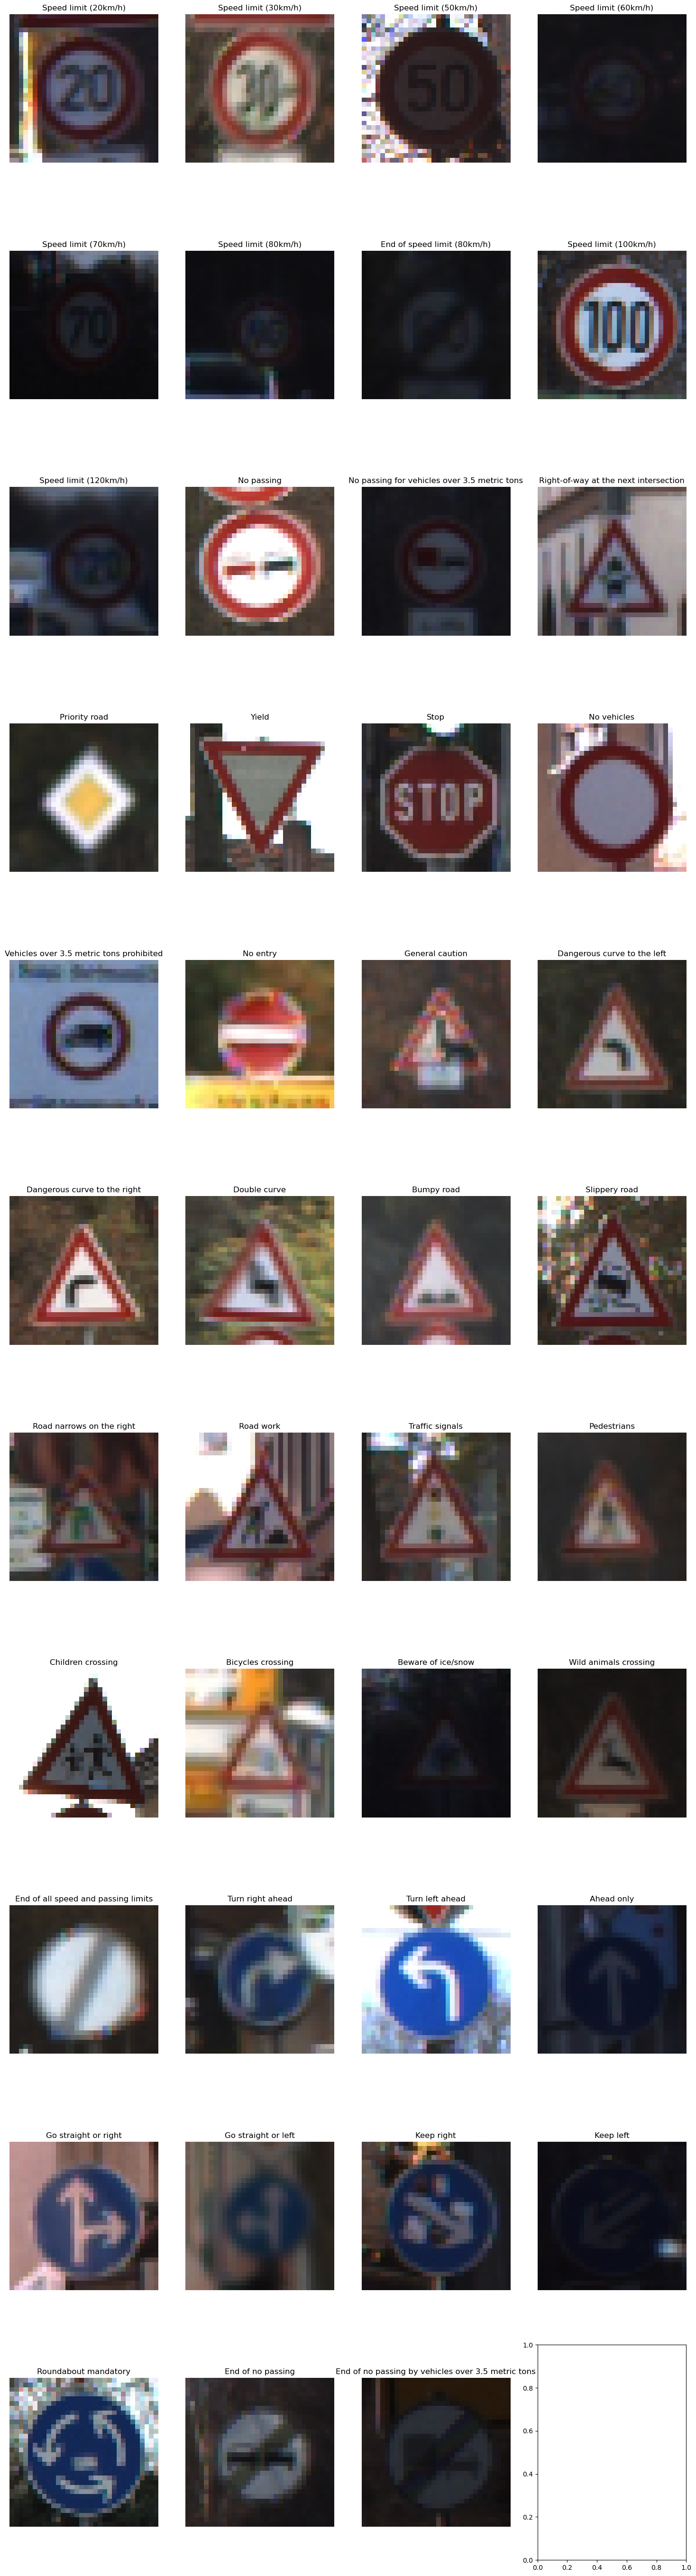

In [ ]:
plot_random_signs(train, signnames)

## Data Preprocessing
- Convert to grayscale
- Normalize the data
- Shuffle the data

In [34]:
def normalize_images(image_dict):
    """
    Normalizes traffic sign images.

    Args:
        image_dict (dict): A dictionary containing traffic sign images.

    Returns:
        dict: A dictionary containing normalized traffic sign images.
    """
    normalized_images = []

    for image in image_dict['features']:
        normalized_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        normalized_images.append(normalized_image)
    
    normalized_data_dict = image_dict.copy()
    normalized_data_dict['features'] = normalized_images
    
    return normalized_data_dict

In [49]:
def grayscale_images(image_dict):
    """
    Converts traffic sign images to grayscale.

    Args:
        image_dict (dict): A dictionary containing traffic sign images.

    Returns:
        dict: A dictionary containing grayscale traffic sign images.
    """

    grayscale_images = []
    
    for image in image_dict['features']:
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        grayscale_images.append(grayscale_image)
    
    grayscale_data_dict = image_dict.copy()
    grayscale_data_dict['features'] = grayscale_images
    
    return grayscale_data_dict

In [46]:
def plot_image(image_dict, index):
    """
    Plots a traffic sign image.

    Args:
        image_dict (dict): A dictionary containing traffic sign images.
        index (int): The index of the image to plot.
    """
    image = image_dict['features'][index]
    plt.imshow(image, cmap='gray')
    plt.show()

In [50]:
normal_train = normalize_images(train)
grayscale_train = grayscale_images(train)
normal_gray_train = normalize_images(grayscale_train)

Default image


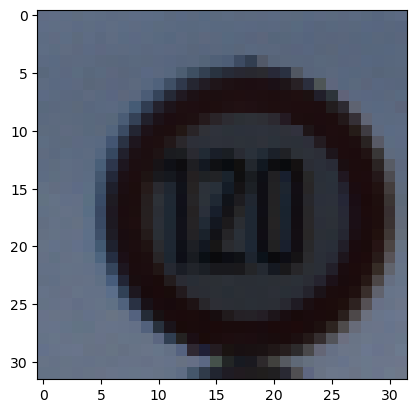

Normalized image


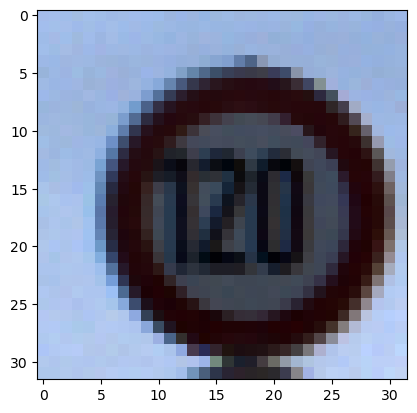

Grayscale image


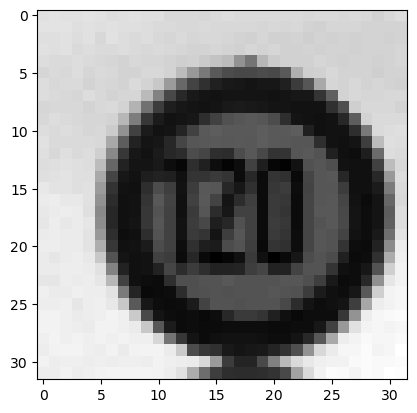

Normalized grayscale image


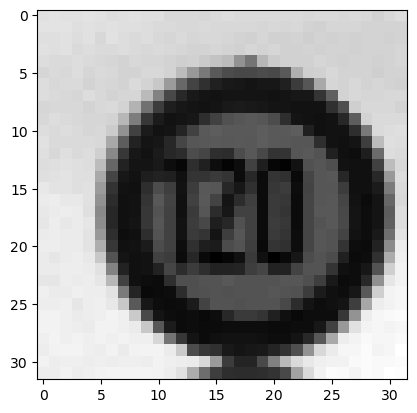

In [51]:
print('Default image')
plot_image(train, 123)
print('Normalized image')
plot_image(normal_train, 123)
print('Grayscale image')
plot_image(grayscale_train, 123)
print('Normalized grayscale image')
plot_image(normal_gray_train, 123)